<h3>Load helper functions</h3>

In [32]:
%run _utils.ipynb

<h3>Load Greenkeeper In-Range Breaking Build <code>issues</code> and <code>all_issues</code> and Create data sets of <code>non_gk_issues</code> and <code>gk_issues</code></h3>
<p>NOTE These are saved csvs and can be loaded using <code>load_gk_issues_for_analysis()</code> and <code>load_non_gk_issues_for_analysis()</code></p>
<p>NOTE that this includes every single issue from every single repo in the list of repos from the GK In-range breaking build issues set</p>
<p>
    For analysis, we ignore gk_issues that we dont have all issues for, and remove the duplicate gk_issues from the all_issues data set
</p>

In [36]:
# Built from the two cells below
gk_issues = load_gk_issues_for_analysis()
non_gk_issues = load_non_gk_issues_for_analysis()

In [47]:
all_issues = load_all_issues()

In [48]:
all_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398438 entries, 0 to 2398437
Data columns (total 20 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               int64              
 1   repo_name        category           
 2   url              object             
 3   repository_url   object             
 4   comments_url     object             
 5   events_url       object             
 6   html_url         object             
 7   number           int64              
 8   title            object             
 9   user_id          int64              
 10  user_login       category           
 11  user_type        category           
 12  state            category           
 13  locked           bool               
 14  comments         int64              
 15  created_at       datetime64[ns, UTC]
 16  updated_at       datetime64[ns, UTC]
 17  closed_at        datetime64[ns, UTC]
 18  body             object             
 19  

In [49]:
temp = all_issues[~all_issues['is_pull_request']]

In [58]:
temp2 = temp[temp['user_login'] == 'greenkeeper[bot]'].copy().reset_index(drop=True)
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115759 entries, 0 to 115758
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   id               115759 non-null  int64              
 1   repo_name        115759 non-null  category           
 2   url              115759 non-null  object             
 3   repository_url   115759 non-null  object             
 4   comments_url     115759 non-null  object             
 5   events_url       115759 non-null  object             
 6   html_url         115759 non-null  object             
 7   number           115759 non-null  int64              
 8   title            115759 non-null  object             
 9   user_id          115759 non-null  int64              
 10  user_login       115759 non-null  category           
 11  user_type        115759 non-null  category           
 12  state            115759 non-null  category           
 13 

In [81]:

pattern = r'An in-range update of .* is breaking the build'

matched = temp2[temp2['title'].str.contains(pattern)]
not_matched = temp2[~temp2['title'].str.contains(pattern)]
not_matched = not_matched[~not_matched['title'].str.contains('Action required: Greenkeeper could not be activated')]
not_matched = not_matched[~not_matched['title'].str.contains('Version 10 of node.js has been released', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Payment required', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Invalid Greenkeeper configuration file', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Greenkeeper is no longer available for new installations', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Version 4 of node.js has been deprecated', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Implement Greenkeeper', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('ci(pkg): enable Greenkeeper', regex=False)]
not_matched = not_matched[~not_matched['title'].str.contains('Drop support for node 4 / npm 2', regex=False)]

not_matched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 8698 to 114409
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               24 non-null     int64              
 1   repo_name        24 non-null     category           
 2   url              24 non-null     object             
 3   repository_url   24 non-null     object             
 4   comments_url     24 non-null     object             
 5   events_url       24 non-null     object             
 6   html_url         24 non-null     object             
 7   number           24 non-null     int64              
 8   title            24 non-null     object             
 9   user_id          24 non-null     int64              
 10  user_login       24 non-null     category           
 11  user_type        24 non-null     category           
 12  state            24 non-null     category           
 13  locked         

In [82]:
not_matched['title'].value_counts()

An in-range update of eslint-plugin-react is fine                                    5
An in-range update of is-callable is not breaking the build 🚨                        3
Update postcss-values-parser to `1.2.0`                                              1
Update IDW to latest version                                                         1
Update to rollup@1.19.4                                                              1
react-native lacking a version compatible with react 15.5 is breaking the build 🚨    1
An in-range update of eslint-config-airbnb is fine                                   1
JSONLint is broken in CI due to npm registry changes                                 1
http2 tests fail on node 14.1.0                                                      1
Upgrade react to the latest                                                          1
iD fails to build on Node 10                                                         1
Make tests deterministic                   

In [89]:
not_matched['repo_name'].value_counts().head(27)

airbnb/react-dates                3
lesshint/lesshint                 2
airbnb/hypernova-aphrodite        2
cytoscape/cytoscape.js            1
airbnb/rheostat                   1
PrismarineJS/mineflayer           1
airbnb/hypernova-node             1
MCS-Lite/mcs-lite                 1
pump-io/pump.io                   1
3box/3box-js                      1
ljharb/es-to-primitive            1
Mermade/oas-kit                   1
KenanY/vorici                     1
donejs/donejs                     1
openstreetmap/iD                  1
ljharb/es-abstract                1
airbnb/react-with-styles          1
inspect-js/is-equal               1
webhintio/hint                    1
CraveFood/farmblocks              1
savvy-css/box-shadow-variables    0
kevinkace/posthtml-pseudo         0
joelmukuthu/angular-snapscroll    0
shinima/temme                     0
jonathanong/ci-reference-app      0
jontey/my-portfolio               0
jpwilliams/remit                  0
Name: repo_name, dtype: int6

In [35]:
# issues = load_issues()
# all_issues = load_all_issues()
# counts = all_issues.groupby('repo_name')['id'].count()
# print(f"Count={len(all_issues)} (Project Count={len(counts)}) Median={counts.median()} Mean={counts.mean()}")
# for_plot = counts.to_frame(name='num_of_issues')
# for_plot['placeholder'] = ''
# for_plot['num_of_issues_log'] = np.log10(for_plot['num_of_issues'])
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,2))
# ax = sns.violinplot(
#     data=for_plot,
#     x='num_of_issues_log',
#     y='placeholder',
#     inner='quartile',
#     palette=['0.9'],
#     logscale=True
# )
# ax.set_ylabel('')
# ax.xaxis.set_major_formatter(log10_func_formatter)
# plt.show()

In [16]:
# def filter_issues_for_analyses(all_issues, gk_issues):
#     # Make copies
#     gk_issues_for_analysis = gk_issues.copy()
#     non_gk_issues_for_analysis = all_issues.copy()
#     # Remove pull requests from all issues
#     non_gk_issues_for_analysis = non_gk_issues_for_analysis[
#         ~non_gk_issues_for_analysis['is_pull_request']
#     ]
#     # Filter out any issues that are GK in-range breakin gbuild issues
#     non_gk_issues_for_analysis = non_gk_issues_for_analysis[
#         ~non_gk_issues_for_analysis['id'].isin(gk_issues_for_analysis['id'])
#     ]
#     # Only analyze GK issues for projects we have all issues for
#     gk_issues_for_analysis = gk_issues_for_analysis[
#         gk_issues_for_analysis['repo_name'].isin(non_gk_issues_for_analysis['repo_name'])
#     ]
#     # Copy the html_url and body attributes over from all_issues to their respective rows on gk_issues
#     gk_issues_for_analysis = gk_issues_for_analysis.merge(
#         all_issues[['id', 'html_url', 'body']],
#         how='left',
#         on='id',
#     )
#     # Only select non-GKIRs that were created after the first GKIR was created in the project
#     first_gkir_created_at = (
#         gk_issues
#             .sort_values(['repo_name', 'created_at'], ascending=True)
#             .groupby('repo_name')['created_at']
#             .first()
#             .reset_index()
#     )
#     def foo(df, first_gkirs):
#         if len(df) == 0:
#             return pd.DataFrame()
#         try:
#             first_gkir = (
#                 first_gkirs[
#                     first_gkirs['repo_name'] == df.iloc[0]['repo_name']
#                 ]['created_at']
#                 .to_numpy()[0]
#             )
#         except Exception:
#             return pd.DataFrame()
#         return df[df['created_at'] >= first_gkir]
#     non_gk_issues_for_analysis = (
#         non_gk_issues_for_analysis
#             .groupby('repo_name')
#             .apply(lambda df: foo(df, first_gkir_created_at))
#             .reset_index(drop=True)
#     )
#     return non_gk_issues_for_analysis, gk_issues_for_analysis
    

# non_gk_issues, gk_issues = filter_issues_for_analyses(all_issues, issues)

# import re
# def extract_dependency_type(row):
#     try:
#         prior_cats = ['devDependency', 'dependency', 'optionalDependency', 'peerDependency']
#         if row['dependency_type'] in prior_cats:
#             return row['dependency_type']

#         body = row['body'].replace(' ', '')
#         pattern = '<thalign=left>\\nType\\n<\/td>\\n<td>\\n(.*)\\n<\/td>'
#         match = re.search(pattern, body)
#         if match is None:
#             return pd.NA
#         split_lines = match[0].splitlines()
#         if 'devDependency' in split_lines:
#             return 'devDependency'
#         elif 'dependency' in split_lines:
#             return 'dependency'
#         elif 'peerDependency' in split_lines:
#             return 'peerDependency'
#         else:
#             return pd.NA
#     except Exception:
#         return pd.NA

# gk_issues['dependency_type'] = gk_issues.apply(extract_dependency_type, axis=1)

# gk_issues.to_csv(f'{PROJECT_ROOT}/{CSV_FOLDER}/gk_issues_for_analysis.csv', index=False)
# non_gk_issues.to_csv(f'{PROJECT_ROOT}/{CSV_FOLDER}/non_gk_issues_for_analysis.csv', index=False)

## NOTE: These can be loaded using load_gk_issues_for_analysis() and load_non_gk_issues_for_analysis()

<h3>What data are we missing?</h3>

How many unique projects?

In [37]:
gk_issues['repo_name'].nunique()

9632

In [36]:
gkir_repos = gk_issues[['repo_name']].drop_duplicates().reset_index(drop=True)
# stargazers_count['stargazers_count'] = ''
gkir_repos.to_csv(f'../csv/gkir_repos.csv', index=False)

In [41]:
gkir_repos_info = pd.read_csv(f'../csv/gkir_repos_info.csv')
gkir_repos_info.describe()

,size,stargazers_count,watchers_count
count,9.626000e+03,9626.000000,9626.000000
mean,1.012887e+04,248.960835,248.960835
std,6.155383e+04,1891.068305,1891.068305
min,1.000000e+00,0.000000,0.000000
25%,2.460000e+02,1.000000,1.000000
50%,1.314500e+03,6.000000,6.000000
75%,4.392500e+03,35.000000,35.000000
max,2.243229e+06,69711.000000,69711.000000


How many unique issue ids?

In [38]:
gk_issues['id'].nunique()

93196

In [39]:
non_gk_issues['id'].nunique()

285555

<AxesSubplot:>

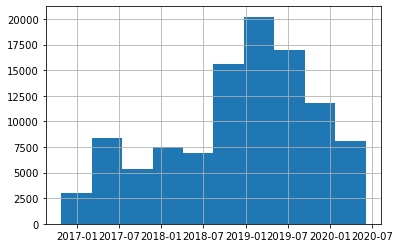

In [10]:
gk_issues['created_at'].hist()

What proportion are missing dependency name?

In [11]:
missing_dependency_name = gk_issues[pd.isna(gk_issues['dependency_name'])]
len(missing_dependency_name) / len(gk_issues)

0.04291014213442544

<AxesSubplot:>

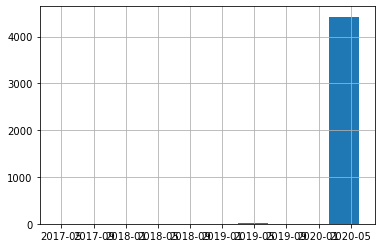

In [12]:
missing_dependency_name['created_at'].hist()

What proportion are missing dependency name?

In [13]:
missing_dependency_next_version = gk_issues[pd.isna(gk_issues['dependency_next_version'])]
len(missing_dependency_next_version) / len(gk_issues)

0.36377740303541317

<AxesSubplot:>

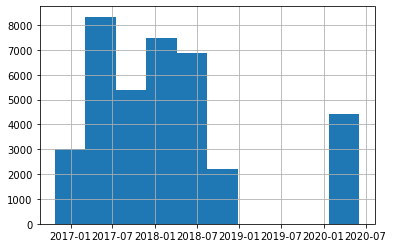

In [14]:
missing_dependency_next_version['created_at'].hist()

What proportion are missing dependency type?

In [15]:
missing_dependency_type = gk_issues[pd.isna(gk_issues['dependency_type'])]
len(missing_dependency_type) / len(gk_issues)

0.04331486388821971

<AxesSubplot:>

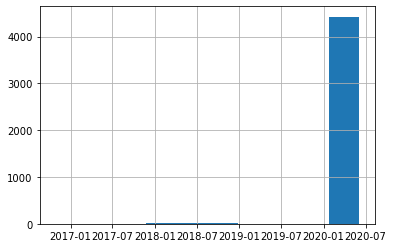

In [16]:
missing_dependency_type['created_at'].hist()

In [17]:
missing_dependency_type['url'].sample()

3435    https://api.github.com/repos/npmkit/npmkit/issues/97
Name: url, dtype: object

<h2>Observation 1) Approximately 40% of IRs are GKIRs</h2>

In [40]:
non_gk_issues__count = (
    non_gk_issues
        .groupby('repo_name')['id']
        .count()
        .to_frame(name='issue_count')
        .reset_index()
)
gk_issues__count = (
    gk_issues
        .groupby('repo_name')['id']
        .count()
        .to_frame(name='issue_count')
        .reset_index()
)

gk_to_non_gk_issue_counts = non_gk_issues__count.merge(
    gk_issues__count,
    on='repo_name',
    how='inner',
    suffixes=['_non_gk', '_gk'],
)
gk_to_non_gk_issue_counts['proportion_gk'] = (
    gk_to_non_gk_issue_counts['issue_count_gk'] / 
    (gk_to_non_gk_issue_counts['issue_count_gk'] + gk_to_non_gk_issue_counts['issue_count_non_gk'])
)
gk_to_non_gk_issue_counts['isue_count_total'] = gk_to_non_gk_issue_counts['issue_count_non_gk'] + gk_to_non_gk_issue_counts['issue_count_gk']

gk_to_non_gk_issue_counts['higher_than_median'] = (
    gk_to_non_gk_issue_counts['isue_count_total'] >= gk_to_non_gk_issue_counts['isue_count_total'].median()
)

for_plot = pd.DataFrame({
    'proportion_gk': gk_to_non_gk_issue_counts['proportion_gk'],
    'higher_than_median': False
})

for_plot = for_plot.append(
    pd.DataFrame({
        'proportion_gk': gk_to_non_gk_issue_counts.loc[
            gk_to_non_gk_issue_counts['higher_than_median'],
            'proportion_gk'
        ],
        'higher_than_median': True 
    })
)
for_plot['placeholder'] = ''

In [93]:
print('--What proportion of issues in a project are GK issues?--')
tfns(
    gk_to_non_gk_issue_counts,
    ['proportion_gk', 'issue_count_gk', 'issue_count_non_gk'],
    should_round=True
)
print('--What proportion of issues in a project are GK issues (With at least the median total number of issues)?--')
tfns(
    gk_to_non_gk_issue_counts[gk_to_non_gk_issue_counts['higher_than_median']],
    ['proportion_gk', 'issue_count_gk', 'issue_count_non_gk'],
    should_round=True
)
print('--What proportion of issues in a project are GK issues (With less than the median total number of issues)?--')
tfns(
    gk_to_non_gk_issue_counts[~gk_to_non_gk_issue_counts['higher_than_median']],
    ['proportion_gk', 'issue_count_gk', 'issue_count_non_gk'],
    should_round=True
)

--What proportion of issues in a project are GK issues?--
                      Count    Mean      STD    Min    25%    Median     75%       Max
------------------  -------  ------  -------  -----  -----  --------  ------  --------
proportion_gk          6824   0.516    0.295      0   0.25       0.5   0.778     0.998
issue_count_gk         6824  12.848   34.728      1   2          5    12      1781
issue_count_non_gk     6824  41.846  250.269      1   1          4    14      9633

--What proportion of issues in a project are GK issues (With at least the median total number of issues)?--
                      Count    Mean      STD    Min    25%    Median     75%       Max
------------------  -------  ------  -------  -----  -----  --------  ------  --------
proportion_gk          3560   0.466    0.342      0   0.13     0.417   0.819     0.998
issue_count_gk         3560  21.584   46.34       1   6       12      22      1781
issue_count_non_gk     3560  78.019  342.545      1   4       

Saving figure projects_proportion_of_gk_issues


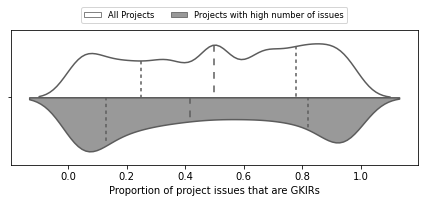

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
sns.violinplot(
    data=for_plot,
    x='proportion_gk',
    y='placeholder',
    hue='higher_than_median',
    split=True,
    inner='quartile',
    palette=['1', '0.6'],
    scale='width',
)
ax.set_ylabel('')
ax.set_xlabel('Proportion of project issues that are GKIRs')
ax.legend(
    title='',
)
L = plt.legend(
    loc='upper center',
    fontsize='small',
    fancybox=True,
    bbox_to_anchor=(0.5,1.2),
    ncol=2
)

L.get_texts()[0].set_text('All Projects')
L.get_texts()[1].set_text('Projects with high number of issues')

save_fig('projects_proportion_of_gk_issues')
plt.show()

<h2>Observation 2) What proportion of in-range breaking build issue reports are closed (i.e., resolved)?</h2>
<p>
    Overall, in-range breaking build issue reports are closed 79.8% of the time (20.2% are never closed).
    <br>
    When comparing at the intra-project level, the median proportion of in-range breaking build issue reports closed by individual projects is 100% (median for other issues is 0.905). Projects are closing in-range breaking build issue reports at the same rate as other issues in the project (median ratio for gk to non-gk is 1.022).
</p>

In [42]:
proportions = (
    gk_issues['state'].value_counts() / 
    gk_issues['state'].count()
).to_frame(name='proportion')\
    .rename_axis('state')\
    .reset_index()
print('--All GK in-range breaking issue state proportions (not calculated per project)--')
proportions.head()

--All GK in-range breaking issue state proportions (not calculated per project)--


,state,proportion
0,closed,0.822751
1,open,0.177249


In [43]:
proportions = (
    non_gk_issues['state'].value_counts() / 
    non_gk_issues['state'].count()
).to_frame(name='proportion')\
    .rename_axis('state')\
    .reset_index()
print('--All non-GKIRs state proportions (not calculated per project)--')
proportions.head()

--All non-GKIRs state proportions (not calculated per project)--


,state,proportion
0,closed,0.7984
1,open,0.2016


In [44]:
non_gk_issues__state_proportions = (
    (
        non_gk_issues.groupby('repo_name', observed=True)['state'].value_counts() / 
        non_gk_issues.groupby('repo_name')['state'].count()
    ).to_frame(name='proportion').reset_index()
)
gk_issues__state_proportions = (
    (
        gk_issues.groupby('repo_name')['state'].value_counts() / 
        gk_issues.groupby('repo_name')['state'].count()
    ).to_frame(name='proportion').reset_index()
)

project_issue__state_proportions = non_gk_issues__state_proportions.merge(
    gk_issues__state_proportions,
    how='inner',
    on=['repo_name', 'state'],
    suffixes=['_non_gk', '_gk'],
)
project_issue__state_proportions['ratio'] = project_issue__state_proportions['proportion_gk'] / project_issue__state_proportions['proportion_non_gk']
project_issue__state_proportions__closed = project_issue__state_proportions[project_issue__state_proportions['state'] == 'closed']

print('--Intra-project comparison for proportion of closed non-GKIRs & GKIRs--')
tfns(project_issue__state_proportions__closed, ['proportion_non_gk', 'proportion_gk', 'ratio'], title='Proportion of closed issues')
plt.show()

mannwhitneyu_cliffsdelta(
    project_issue__state_proportions__closed['proportion_gk'],
    project_issue__state_proportions__closed['proportion_non_gk']
)

--Intra-project comparison for proportion of closed non-GKIRs & GKIRs--
Proportion of closed issues      Count    Mean      STD    Min    25%    Median    75%     Max
-----------------------------  -------  ------  -------  -----  -----  --------  -----  ------
proportion_non_gk                 5271  17.377  115.443  0       0.25         1  4.5    4586.5
proportion_gk                     5271   0.927    0.186  0.032   1            1  1         1
ratio                             5271  15.007   98.41   0       0.2          1  3.556  4069

	Mann-Whitney: statistic=13106745.0 pvalue=6.128037226553316e-08
	Cliff'a Delta: delta=-0.05650671563684282 size=negligible
    


<h4>Project ratio between proportion of closed non-gk issues and gk issues</h4>

In [45]:
projects_with_high_gk_counts = (
    gk_to_non_gk_issue_counts[
        gk_to_non_gk_issue_counts['issue_count_gk'] >= gk_to_non_gk_issue_counts['issue_count_gk'].median()
    ]['repo_name'].copy().reset_index(drop=True)
)

project_issue_with_high_gk_counts__state_proportions = (
    project_issue__state_proportions[
        project_issue__state_proportions['repo_name'].isin(projects_with_high_gk_counts)
    ]
)
project_issue__state_proportions__closed = (
    project_issue_with_high_gk_counts__state_proportions[
        project_issue_with_high_gk_counts__state_proportions['state'] == 'closed'
    ]
)

print('--Intra-project comparison for proportion of closed non-GKIRs & GKIRs--')
tfns(project_issue__state_proportions__closed, ['proportion_non_gk', 'proportion_gk', 'ratio'], title='Proportion of closed issues')
plt.show()


mannwhitneyu_cliffsdelta(
    project_issue__state_proportions__closed['proportion_gk'],
    project_issue__state_proportions__closed['proportion_non_gk']
)


--Intra-project comparison for proportion of closed non-GKIRs & GKIRs--
Proportion of closed issues      Count    Mean      STD    Min    25%    Median    75%     Max
-----------------------------  -------  ------  -------  -----  -----  --------  -----  ------
proportion_non_gk                 3081  22.592  139.659  0      0.262     1          6  4586.5
proportion_gk                     3081   0.904    0.211  0.032  0.955     1          1     1
ratio                             3081  12.12    71.144  0      0.143     0.733      3  2123

	Mann-Whitney: statistic=4162783.5 pvalue=2.0462616196416478e-18
	Cliff'a Delta: delta=-0.12293774040535531 size=negligible
    


<h2>Observation 3) How long does it take for in-range breaking build issue reports to be closed (i.e., resolved)?</h2>
<ul>
    <li>Overall, in-range breaking build issue reports are closed in a median of 4 days 11 hours.</li>
    <li>When comparing at the intra-project level, the median time to close in-range breaking build issues is 13 days 21 hours, while the median time to close other issues is 6 days 6 hours.</li>
    <li>At the project level, in-range breaking build issue reports stay open with a medain value of 1.575x as long as other issues.</li>
</ul>

/home/local/SAIL/benjamin/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


--Intra-project comparison for median time to close issues & median time to close GK in-range breaking build issues--
Median time to close issue      Count  Mean              STD                Min              25%              Median            75%               Max
----------------------------  -------  ----------------  -----------------  ---------------  ---------------  ----------------  ----------------  ------------------
median_non_gk                    5271  46 days 07:45:47  112 days 23:59:12  0 days 00:00:03  1 days 03:24:05  6 days 13:47:16   30 days 01:35:40  1171 days 00:00:28
median_gk                        5271  54 days 10:16:56  111 days 18:08:36  0 days 00:00:31  1 days 14:30:06  11 days 18:58:14  50 days 19:17:54  1130 days 03:37:18

Saving figure intra_project_median_time_to_close


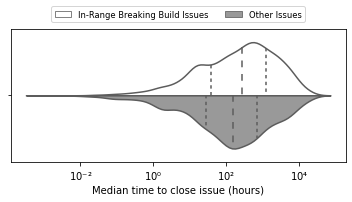

	Mann-Whitney: statistic=12397413.5 pvalue=5.64576217794053e-22
	Cliff'a Delta: delta=0.10756817343107357 size=negligible
    


In [46]:
# Calculate mean and median intra-project time_to_close for Non-GK issues
non_gk_issues__closed = non_gk_issues[non_gk_issues['state'] == 'closed'].copy()
non_gk_issues__closed['time_to_close'] = (
    (non_gk_issues__closed['closed_at'] - non_gk_issues__closed['created_at'])
        .dt
        .total_seconds()  # Have to convert to seconds to calculate mean and median
)
project__non_gk_issue__time_to_close = (
    non_gk_issues__closed
        .groupby('repo_name')['time_to_close']
        .agg(['mean', 'median'])
        .reset_index()
        .dropna()
)
project__non_gk_issue__time_to_close['mean'] = pd.to_timedelta(
    project__non_gk_issue__time_to_close['mean'],
    unit='s'
)
project__non_gk_issue__time_to_close['mean_hours_log'] = np.log10(
    project__non_gk_issue__time_to_close['mean'] / np.timedelta64(1, 'h')
)
project__non_gk_issue__time_to_close['median'] = pd.to_timedelta(
    project__non_gk_issue__time_to_close['median'],
    unit='s'
)
project__non_gk_issue__time_to_close['median_hours'] = (
    project__non_gk_issue__time_to_close['median'] / np.timedelta64(1, 'h')
)
project__non_gk_issue__time_to_close['median_hours_log'] = np.log10(
    project__non_gk_issue__time_to_close['median_hours']
)

# Calculate mean and median intra-project time_to_close for GK issues
gk_issues__closed = gk_issues[gk_issues['state'] == 'closed'].copy()
gk_issues__closed['time_to_close'] = (
    gk_issues__closed['closed_at'] - gk_issues__closed['created_at']
).dt.total_seconds()  # Have to convert to seconds to calculate mean and median
project__gk_issue__time_to_close = (
    gk_issues__closed
        .groupby('repo_name')['time_to_close']
        .agg(['mean', 'median'])
        .reset_index()
        .dropna()
)
project__gk_issue__time_to_close['mean'] = pd.to_timedelta(
    project__gk_issue__time_to_close['mean'],
    unit='s'
)
project__gk_issue__time_to_close['mean_hours_log'] = np.log10(
    project__gk_issue__time_to_close['mean'] / np.timedelta64(1, 'h')
)
project__gk_issue__time_to_close['median'] = pd.to_timedelta(
    project__gk_issue__time_to_close['median'],
    unit='s'
)
project__gk_issue__time_to_close['median_hours'] = (
    project__gk_issue__time_to_close['median'] / np.timedelta64(1, 'h')
)
project__gk_issue__time_to_close['median_hours_log'] = np.log10(
    project__gk_issue__time_to_close['median_hours']
)

# Merge the two
project__all_issues__time_to_close = project__non_gk_issue__time_to_close.merge(
    project__gk_issue__time_to_close,
    how='inner',
    on=['repo_name'],
    suffixes=['_non_gk', '_gk'],
)

# Melt for violine plot
melted = pd.melt(
    project__all_issues__time_to_close,
    id_vars='repo_name',
    value_vars=['median_hours_log_gk', 'median_hours_log_non_gk'],
    var_name='issue_type',
    value_name='median_time_to_close_hours_log',
)

melted['placeholder'] = ''
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
sns.violinplot(
    data=melted,
    x='median_time_to_close_hours_log',
    y='placeholder',
    hue='issue_type',
    split=True,
    inner='quartile',
    palette=['1', '0.6'],
    ax=ax,
)
ax.set_ylabel('')
ax.set_xlabel('Median time to close issue (hours)')
ax.xaxis.set_major_formatter(log10_func_formatter)

L = plt.legend(
    loc='upper center',
    fontsize='small',
    fancybox=True,
    bbox_to_anchor=(0.5,1.2),
    ncol=2,
    shadow=False,
)
L.get_texts()[0].set_text('In-Range Breaking Build Issues')
L.get_texts()[1].set_text('Other Issues')
print('--Intra-project comparison for median time to close issues & median time to close GK in-range breaking build issues--')
tfns(
    project__all_issues__time_to_close,
    ['median_non_gk', 'median_gk'],
    title='Median time to close issue'
)
save_fig('intra_project_median_time_to_close')
plt.show()

mannwhitneyu_cliffsdelta(
    project__all_issues__time_to_close['median_hours_log_gk'],
    project__all_issues__time_to_close['median_hours_log_non_gk']
)

<h3>What dependency types are GKIRs opened for?</h3>

In [35]:
gk_issues['dependency_type'].value_counts() / gk_issues['dependency_type'].count()

devDependency         0.699488
dependency            0.298634
optionalDependency    0.001166
peerDependency        0.000712
Name: dependency_type, dtype: float64

<ipython-input-54-8c6bd8f8e772>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=12)


	Mann-Whitney: statistic=280485112.5 pvalue=1.5314886489480827e-12
	Cliff'a Delta: delta=0.03839378533679006 size=negligible
    


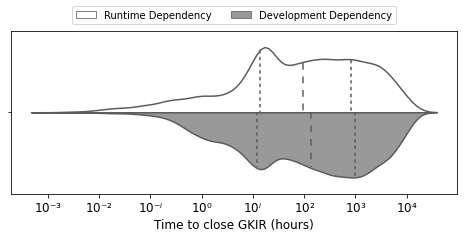

In [54]:
gk_issues_simplified = (
    gk_issues[
        gk_issues['state'] == 'closed'
    ][
        ['created_at', 'closed_at', 'dependency_type']
    ].dropna()
    .copy()
)
gk_issues_simplified['time_to_close'] = (
    gk_issues_simplified['closed_at'] - gk_issues_simplified['created_at']
)
gk_issues_simplified['time_to_close_hours'] = (
    gk_issues_simplified['time_to_close'] / np.timedelta64(1, 'h')
)
gk_issues_simplified['time_to_close_hours_log'] = (
    np.log10(gk_issues_simplified['time_to_close_hours'])
)
types_to_analyze = ['devDependency', 'dependency']
gk_issues_simplified = gk_issues_simplified[gk_issues_simplified['dependency_type'].isin(types_to_analyze)]
gk_issues_simplified.dependency_type = (
    gk_issues_simplified
        .dependency_type
        .cat
        .remove_categories(['optionalDependency', 'peerDependency'])
)
gk_issues_simplified['placeholder'] = ''

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.violinplot(
    data=gk_issues_simplified,
    x='time_to_close_hours_log',
    y='placeholder',
    hue='dependency_type',
#     order=['large', 'medium', 'small'],
    split=True,
    inner='quartile',
    palette=['1', '0.6'],
    scale='width',
    ax=ax,
)

ax.set_ylabel('', fontsize=12)

ax.set_xlabel('Time to close GKIR (hours)', fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.xaxis.set_major_formatter(log10_func_formatter)

L = plt.legend(
    loc='upper center',
    fancybox=True,
    bbox_to_anchor=(0.5,1.18),
    ncol=2,
    shadow=False,
)
L.get_texts()[0].set_text('Runtime Dependency')
L.get_texts()[1].set_text('Development Dependency')


mannwhitneyu_cliffsdelta(
    gk_issues_simplified[gk_issues_simplified['dependency_type'] == 'devDependency']['time_to_close_hours_log'],
    gk_issues_simplified[gk_issues_simplified['dependency_type'] == 'dependency']['time_to_close_hours_log']
)

plt.show()
